In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pprint
import cartopy.crs as ccrs
import cartopy.feature as cfea
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec

In [36]:
def josui_gesui(city_num, left, right, bottom, top):
    #
    rgndir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region'
    glbdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
    #
    resolution = 12
    POP='gpw4'
    #
    SUF = '.gl5'
    dtype = 'float32'
    gl5shape = (2160, 4320)
    #
    nx, ny = (right - left)*resolution, (top - bottom)*resolution
    rgnshape = (ny, nx)
    img_extent = (left, right, bottom, top)
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    
    #------------------------------------------------------------------------------------------------------------------------
    
    # city mask file
    citymask = np.fromfile(f'{glbdir}/dat/cty_msk_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)
    # crop
    citymask_cropped = citymask[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
    citymask_cropped = np.ma.masked_where(citymask_cropped == 0, citymask_cropped)
    # plot
    projection = ccrs.PlateCarree(central_longitude=0)
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1, projection=projection)
    ax1.coastlines()
    im = ax1.imshow(citymask_cropped, extent=img_extent, transform=projection, cmap='gray_r', vmin=0, vmax=3)
    
    #------------------------------------------------------------------------------------------------------------------------
    
    # intake file
    josui = np.fromfile(f'{glbdir}/dat/cty_prf_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)
    # crop
    josui_cropped = josui[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
    josui_cropped = np.ma.masked_where(josui_cropped == 0, josui_cropped)
    # plot
    #josui_cmap = plt.cm.colors.ListedColormap(['white', 'blue'])
    josui_cmap = plt.cm.colors.ListedColormap(['blue', 'blue'])
    js = ax1.imshow(josui_cropped, extent=img_extent, transform=projection, cmap=josui_cmap)
    
    #------------------------------------------------------------------------------------------------------------------------
    
    # gesui file
    gesui = np.fromfile(f'{glbdir}/dat/cty_swg_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)
    # crop
    gesui_cropped = gesui[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
    gesui_cropped = np.ma.masked_where(gesui_cropped == 0, gesui_cropped)
    # plot
    #gesui_cmap = plt.cm.colors.ListedColormap(['white', 'red'])
    gesui_cmap = plt.cm.colors.ListedColormap(['red', 'red'])
    gs = ax1.imshow(gesui_cropped, extent=img_extent, transform=projection, cmap=gesui_cmap)
    
    #------------------------------------------------------------------------------------------------------------------------
    
    # intake file
    intake = np.fromfile(f'{glbdir}/dat/cty_int_/{POP}/city_{city_num:08}.gl5', dtype='float32').reshape(gl5shape)
    # crop
    intake_cropped = intake[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
    intake_cropped = np.ma.masked_where(intake_cropped == 0, intake_cropped)
    print(np.where(intake_cropped==1))
    # plot
    #intake_cmap = plt.cm.colors.ListedColormap(['white', 'green'])
    intake_cmap = plt.cm.colors.ListedColormap(['green', 'green'])
    it = ax1.imshow(intake_cropped, extent=img_extent, transform=projection, cmap=intake_cmap)
    
    #------------------------------------------------------------------------------------------------------------------------
    
    # intake file
    rivout = np.fromfile(f'{glbdir}/dat/riv_out_/W5E5LR__20190000{SUF}', dtype='float32').reshape(gl5shape)
    # crop
    rivout_cropped = rivout[int(upperindex):int(lowerindex), int(leftindex):int(rightindex)]
    
    ax2 = fig.add_subplot(1, 2, 2, projection=projection)
    ax2.coastlines()
    im = ax2.imshow(rivout_cropped, extent=img_extent, transform=projection, cmap='ocean_r')

    plt.show()

(array([9]), array([10]))


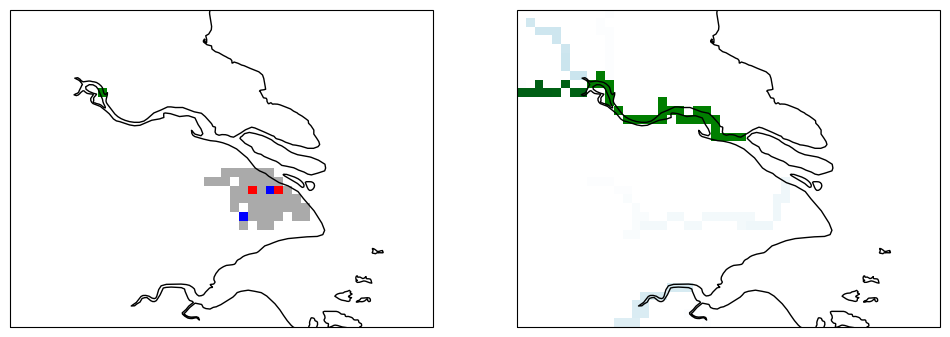

In [37]:
city_num = 3
left = 119
right = 123
bottom = 30
top = 33
josui_gesui(city_num, left, right, bottom, top)

(array([20]), array([4]))


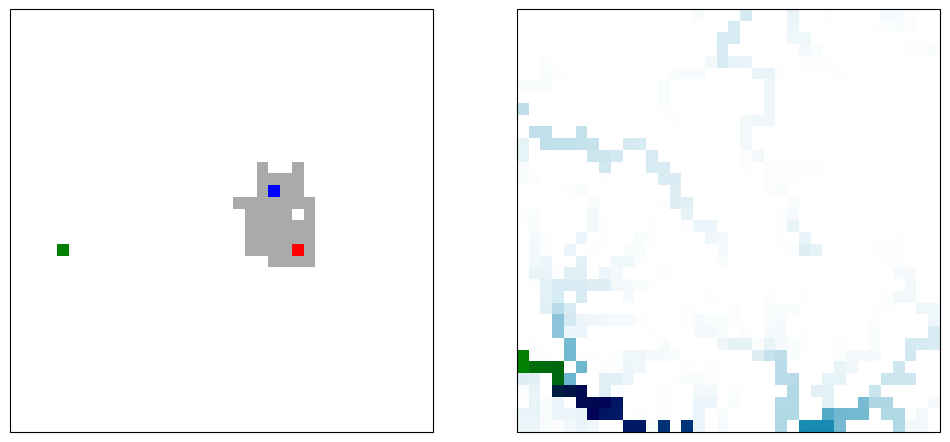

In [38]:
city_num = 4
left = -101
right = -98
bottom = 18
top = 21
josui_gesui(city_num, left, right, bottom, top)

(array([19]), array([23]))


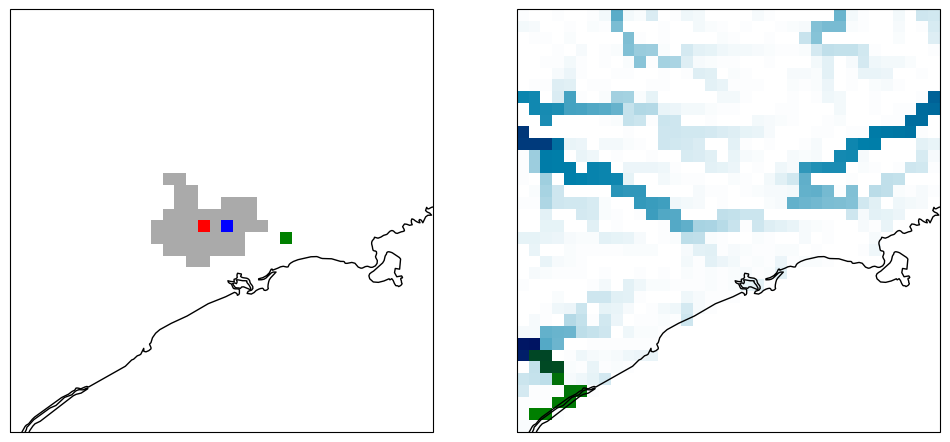

In [39]:
city_num = 5
left = -48
right = -45
bottom = -25
top = -22
josui_gesui(city_num, left, right, bottom, top)

(array([], dtype=int64), array([], dtype=int64))


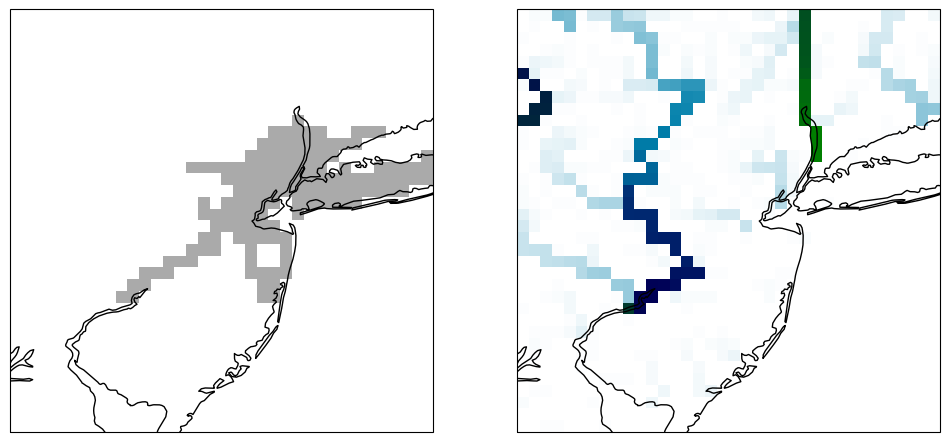

In [40]:
city_num = 7
left = -76
right = -73
bottom = 39
top = 42
josui_gesui(city_num, left, right, bottom, top)

(array([], dtype=int64), array([], dtype=int64))


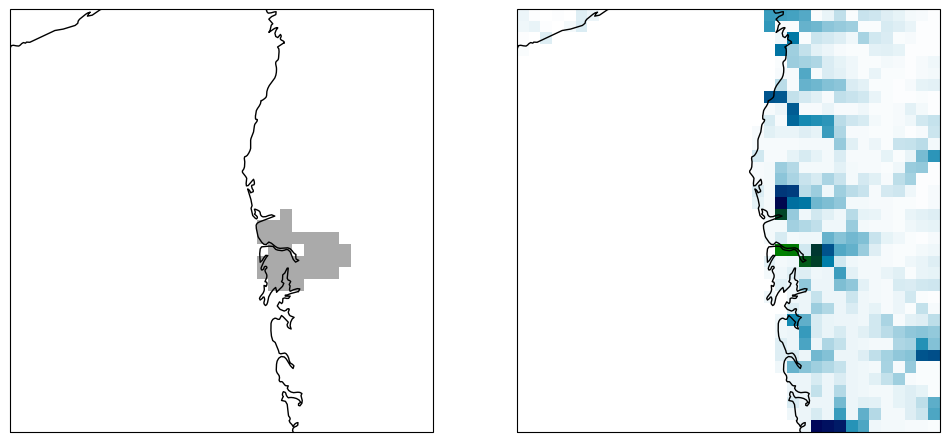

In [41]:
city_num = 8
left = 71
right = 74
bottom = 18
top = 21
josui_gesui(city_num, left, right, bottom, top)

(array([], dtype=int64), array([], dtype=int64))


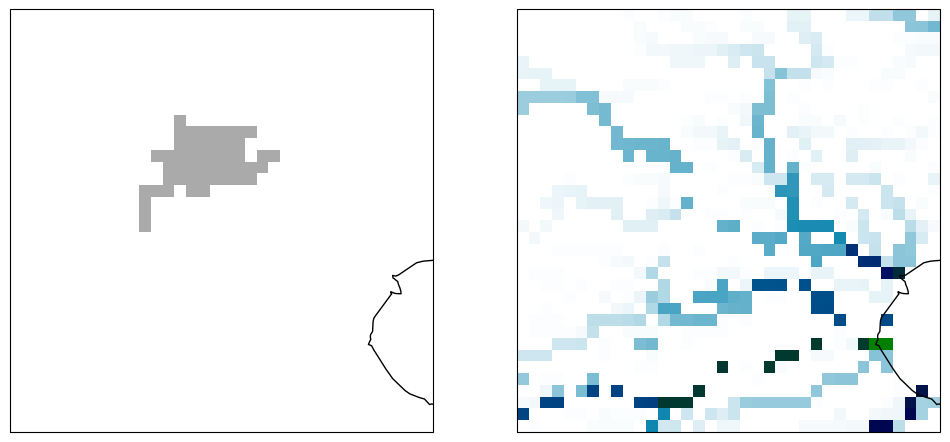

In [42]:
city_num = 10
left = 115
right = 118
bottom = 38
top = 41
josui_gesui(city_num, left, right, bottom, top)

(array([], dtype=int64), array([], dtype=int64))


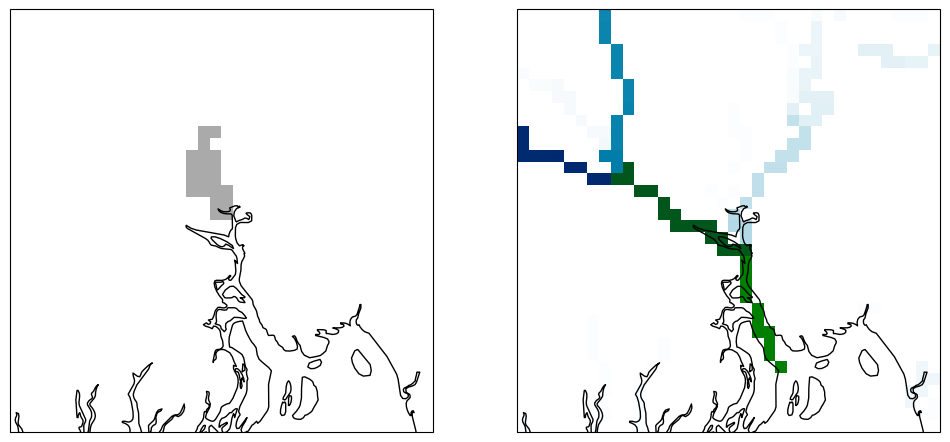

In [43]:
city_num = 11
left = 89
right = 92
bottom = 22
top = 25
josui_gesui(city_num, left, right, bottom, top)

In [ ]:
# 必要なもの
# 対象領域の流域図
# 主河道網
# 標高データ

# 都市内に条件を満たす上下水道が存在しないとき
# A: 主河道 =! 1 and <=limitation 主河道が短すぎる場合は主河道の上下端を浄水場・